In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

np.random.seed(0) # For reproducibility

In [2]:
# Q1 Buffon's Needle Simulation
num_trials = 10000

needle_length = 1.0
line_spacing = 1.0

thetas = np.random.uniform(0, np.pi/2, num_trials)
y_centers = np.random.uniform(0, line_spacing/2, num_trials)

crossings = y_centers <= (needle_length / 2) * np.sin(thetas)
num_crossings = np.sum(crossings)

prop = num_crossings / num_trials
prop_std_err = np.sqrt(prop * (1 - prop) / num_trials)

upp = prop + 1.96 * prop_std_err
low = prop - 1.96 * prop_std_err

pi_estimate = 1 / prop * 2
pi_estimate_upp = 1 / low * 2
pi_estimate_low = 1 / upp * 2


print(f"Estimated value of π from Buffon's Needle: {pi_estimate}")
print(f"95% Confidence Interval: [{pi_estimate_low}, {pi_estimate_upp}]")


Estimated value of π from Buffon's Needle: 3.144654088050314
95% Confidence Interval: [3.098706924324433, 3.1919843556035596]


In [3]:
# Q2 Estimating Pi
num_trials = 10_000

x = np.random.uniform(0, 1, num_trials)
y = np.random.uniform(0, 1, num_trials)
inside_circle = x**2 + y**2 <= 1

num_inside_circle = np.sum(inside_circle)

prop = num_inside_circle / num_trials
std_err = np.sqrt(prop * (1 - prop) / num_trials)

low = prop - 1.96 * std_err
upp = prop + 1.96 * std_err

pi_estimate = prop * 4
pi_estimate_low = low * 4
pi_estimate_upp = upp * 4

print(f"Estimated value of π from Monte Carlo: {pi_estimate}")
print(f"95% Confidence Interval: [{pi_estimate_low}, {pi_estimate_upp}]")


Estimated value of π from Monte Carlo: 3.142
95% Confidence Interval: [3.109818757672209, 3.1741812423277906]


$$Q = \int_{-1}^{1} e^{-x^2 /  2} dx$$

In [4]:
# Q3 Integral 1
num_trials = 10_000

Z = np.random.normal(0, 1, num_trials)
constant = 1 / np.sqrt(2 * np.pi)

indicator = (-1 <= Z) & (Z <= 1)
adjusted = indicator / constant

est = np.mean(adjusted)
std_err = np.std(adjusted) / np.sqrt(num_trials)

low = est - 1.96 * std_err
upp = est + 1.96 * std_err

# print
print(f"Estimated value of the integral: {est}")
print(f"95% Confidence Interval: [{low}, {upp}]")

Estimated value of the integral: 1.72631489273837
95% Confidence Interval: [1.703566505768542, 1.749063279708198]


In [5]:
# Exact value of Q in terms of the normal CDF
exact_value = (norm.cdf(1) - norm.cdf(-1)) / constant
print(f"Exact value of the integral: {exact_value}")

Exact value of the integral: 1.7112487837842973


$$Q = \int_{-\infty}^{\infty} e^{-x^2 / 2} dx$$

In [6]:
# Q4 Integral 2
z = np.random.uniform(0, 1, num_trials)
x = np.exp(-(np.log( z / (1 - z)))**2 / 2) * (1 / z + 1 / (1 - z))

est = np.mean(x)
std_err = np.std(x) / np.sqrt(num_trials)

low = est - 1.96 * std_err
upp = est + 1.96 * std_err

# print
print(f"Estimated value of the integral: {est}")
print(f"95% Confidence Interval: [{low}, {upp}]")

Estimated value of the integral: 2.510018388377912
95% Confidence Interval: [2.4838415223266987, 2.5361952544291255]


In [7]:
# Exact value of Q
exact_value = np.sqrt(2 * np.pi)
print(f"Exact value of the integral: {exact_value}")

Exact value of the integral: 2.5066282746310002


In [8]:
# Q5 Monte Carlo estimation of moments
num_trials = 100_000

f_xy = lambda x, y: np.exp(x * y + np.sin(3 * x + y))
xx = np.random.uniform(0, 1, num_trials)
yy = np.random.uniform(0, 1, num_trials)

# Mean Estimate
f_values = f_xy(xx, yy)
normalization_constant = np.sum(f_values)
mu_x_est = np.sum(f_values * xx) / normalization_constant
mu_y_est = np.sum(f_values * yy) / normalization_constant

print(f"Estimated E[X]: {mu_x_est}")
print(f"Estimated E[Y]: {mu_y_est}")

# Covariance Estimate
var_x = np.sum(f_values * xx**2) / normalization_constant - mu_x_est**2
var_y = np.sum(f_values * yy**2) / normalization_constant - mu_y_est**2
cov_xy = np.sum(f_values * xx * yy) / normalization_constant - mu_x_est * mu_y_est

# print covariance matrix 3 dp
print(f"Estimated Covariance Matrix:\n[[{var_x:.4f}, {cov_xy:.4f}]\n [{cov_xy:.4f}, {var_y:.4f}]]")


Estimated E[X]: 0.4680873661164619
Estimated E[Y]: 0.5199120603773395
Estimated Covariance Matrix:
[[0.0660, -0.0066]
 [-0.0066, 0.0814]]


In [9]:
# Q6 Aces in a deck of cards
cards = [1] * 4 + [0] * 48  # 4 aces and 48 non-aces
num_trials = 100_000

successes = 0
for _ in range(num_trials):
    # split into 2 halves
    np.random.shuffle(cards)
    first_half = cards[:26]
    if sum(first_half) == 4:
        successes += 1

prob_est = successes / num_trials

# print
print(f"Estimated probability of getting all four aces: {prob_est}")

Estimated probability of getting all four aces: 0.05515


In [10]:
# Q7 Increasing random uniforms

successes = 0
for _ in range(num_trials):
    u = np.random.uniform(0, 1, 4)
    if np.all(np.diff(u) > 0):
        successes += 1  
    
prob_est = successes / num_trials

exact_value = 1 / 24

# print
print(f"Estimated probability that 4 random uniforms are in increasing order: {prob_est}")
print(f"Exact probability: {exact_value}")

Estimated probability that 4 random uniforms are in increasing order: 0.04052
Exact probability: 0.041666666666666664


In [11]:
# Q8 Number of rolls to see all faces of a die
num_trials = 100_000

rolls_needed = []
for _ in range(num_trials):
    faces = np.ones(6)
    num_rolls = 0
    while sum(faces) > 0:
        roll = np.random.randint(1, 7)
        faces[roll - 1] = 0
        num_rolls += 1
    rolls_needed.append(num_rolls)

est_mean = np.mean(rolls_needed)
print(f"Estimated expected number of rolls to see all faces: {est_mean}")

Estimated expected number of rolls to see all faces: 14.68461


In [12]:
# Q9 Three birthdays on the same day
n = 100
birthdays = np.random.randint(0, 365, (num_trials, n))
three_same_day = np.array([np.any(np.bincount(birthdays[i]) >= 3) for i in range(num_trials)])

prob_est = np.mean(three_same_day)
print(f"Estimated probability that in a group of {n} people, at least three share the same birthday: {prob_est}")

Estimated probability that in a group of 100 people, at least three share the same birthday: 0.64427


In [13]:
# Q10 Total sum game
first_player_wins = 0
for _ in range(num_trials):
    running_total = 0
    turn = 0
    while running_total <= 11:
        roll = np.random.randint(1, 7)
        running_total += roll
        turn += 1
    if turn % 2 == 0:
        first_player_wins += 1

prob_est = first_player_wins / num_trials
print(f"Estimated probability that the first player wins: {prob_est}")

# prefer to be the second player

Estimated probability that the first player wins: 0.4653


In [14]:
# Q11 Random walk escape

# Expected number of steps to reach either -5 or 10
escape_steps = []
for _ in range(num_trials):
    position = 0
    steps = 0
    while position > -5 and position < 10:
        step = np.random.choice([-1, 1])
        position += step
        steps += 1
    escape_steps.append(steps)

est_mean_steps = np.mean(escape_steps)
print(f"Estimated expected number of steps to reach -5 or 10: {est_mean_steps}")

Estimated expected number of steps to reach -5 or 10: 49.78494


In [15]:
# Estimate the probability of reaching 10 before -5
reach_10_first = 0
for _ in range(num_trials):
    position = 0
    while position > -5 and position < 10:
        step = np.random.choice([-1, 1])
        position += step
    if position == 10:
        reach_10_first += 1

prob_est = reach_10_first / num_trials
print(f"Estimated probability of reaching 10 before -5: {prob_est}")

Estimated probability of reaching 10 before -5: 0.3338


In [18]:
# Exact value of this probability:
k = [-0.5, 1, -0.5]
mat = np.array([
    [1] + [0] * 15, # -5
    k + [0] * 13, # -4
    [0] + k + [0] * 12, # -3
    [0] * 2 + k + [0] * 11, # -2
    [0] * 3 + k + [0] * 10, # -1
    [0] * 4 + k + [0] * 9, # 0
    [0] * 5 + k + [0] * 8, # 1
    [0] * 6 + k + [0] * 7, # 2
    [0] * 7 + k + [0] * 6, # 3
    [0] * 8 + k + [0] * 5, # 4
    [0] * 9 + k + [0] * 4, # 5
    [0] * 10 + k + [0] * 3, # 6
    [0] * 11 + k + [0] * 2, # 7
    [0] * 12 + k + [0] * 1, # 8
    [0] * 13 + k, # 9
    [0] * 15 + [1], # 10
])
rhs = np.array([0] * 15 + [1])
exact_value = np.linalg.solve(mat, rhs)[5]
print(f"Exact probability of reaching 10 before -5: {exact_value}")

Exact probability of reaching 10 before -5: 0.3333333333333334


In [20]:
# Q12 Gambler's Ruin

# Estimate the probability of reaching 50 before going bankrupt
initial_capital = 20
target_capital = 50
num_trials = 10_000

successes = 0
for _ in range(num_trials):
    capital = initial_capital
    while capital > 0 and capital < target_capital:
        bet = np.random.choice([-1, 1])
        capital += bet
    if capital == target_capital:
        successes += 1
prob_est = successes / num_trials
print(f"Estimated probability of reaching {target_capital} before going bankrupt: {prob_est}")

Estimated probability of reaching 50 before going bankrupt: 0.3946


In [21]:
# How does this probability change if the win probability is 0.49 instead of 0.5?
p_win = 0.49
successes = 0
for _ in range(num_trials):
    capital = initial_capital
    while capital > 0 and capital < target_capital:
        bet = 1 if np.random.uniform(0, 1) < p_win else -1
        capital += bet
    if capital == target_capital:
        successes += 1

prob_est = successes / num_trials
print(f"Estimated probability of reaching {target_capital} before going bankrupt with p_win={p_win}: {prob_est}")

Estimated probability of reaching 50 before going bankrupt with p_win=0.49: 0.1903


In [26]:
# Can you compute the exact probability in the fair case?
# Exact value of this probability:
k = [-0.5, 1, -0.5]
mat = np.array([
    [1] + [0] * 50, # 0
] + [
    [0] * i + k + [0] * (49 - i - 1) for i in range(49)
] + [
    [0] * 50 + [1], # 50
])
rhs = np.array([0] * 50 + [1])
exact_value = np.linalg.solve(mat, rhs)[20]
print(f"Exact probability of reaching 50: {exact_value}")


Exact probability of reaching 50: 0.3999999999999964


In [36]:
# Q13 The secretary problem (optimal stopping)

# probability of selecting the best candidate using the see and skip first k strategy
def secretary_problem_strategy(n, k, num_trials=10_000):
    candidates = np.arange(1, n + 1)
    strategy_successes = 0
    for _ in range(num_trials):
        np.random.shuffle(candidates)
        best_so_far = 0
        stop_index = k
        for i in range(stop_index):
            if candidates[i] > best_so_far:
                best_so_far = candidates[i]
        selected = None
        for i in range(stop_index, n):
            if candidates[i] > best_so_far:
                selected = candidates[i]
                break
        if selected is None:
            selected = candidates[-1]
        if selected == n:
            strategy_successes += 1
    return strategy_successes / num_trials

n = 20
k_values = range(n)

probabilities = [secretary_problem_strategy(n, k) for k in k_values]
optimal_k = k_values[np.argmax(probabilities)]
optimal_prob = max(probabilities)

print(f"Optimal k to skip: {optimal_k} with success probability: {optimal_prob}")

Optimal k to skip: 8 with success probability: 0.3843


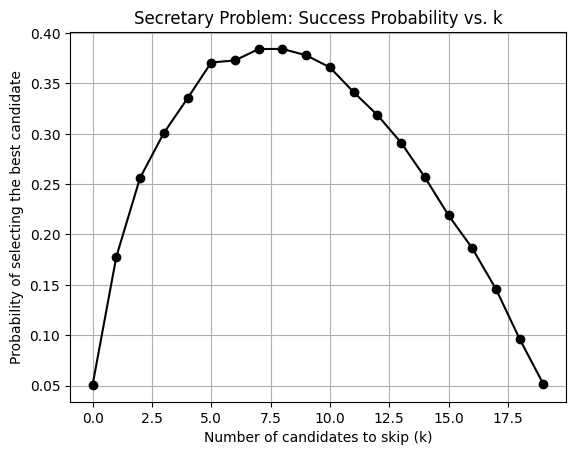

In [37]:
# Plot the probabilities
plt.plot(k_values, probabilities, marker='o', color='black')
plt.title("Secretary Problem: Success Probability vs. k")
plt.xlabel("Number of candidates to skip (k)")
plt.ylabel("Probability of selecting the best candidate")
plt.grid()
plt.show()


In [43]:
# As n -> infty, the optimal k/n approaches 1/e and the success probability approaches 1/e.
n_large = 100
k_values = range(n_large // 2)
probabilities = [secretary_problem_strategy(n_large, k) for k in k_values]
optimal_k = k_values[np.argmax(probabilities)]
ratio = optimal_k / n_large

print(f"For n={n_large}, optimal k={optimal_k}, k/n={ratio}, success probability={max(probabilities)}")

For n=100, optimal k=35, k/n=0.35, success probability=0.3775


In [42]:
int(1/np.e * n_large)

36